In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import os

In [2]:
os.chdir(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Datasets/")

In [3]:
groceries=[]
with open("DataSetA.csv","r") as f:groceries = f.read()
groceries = groceries.split('\n')

groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [4]:
te = TransactionEncoder()
te_ary = te.fit(groceries_list).transform(groceries_list)
te_ary

array([[ True, False,  True, ..., False, False,  True],
       [ True, False, False, ..., False, False, False],
       [ True, False,  True, ..., False,  True, False],
       ...,
       [ True,  True, False, ..., False, False,  True],
       [ True,  True, False, ..., False, False,  True],
       [ True, False, False, ..., False, False, False]])

In [13]:
df = pd.DataFrame(te_ary[:,1:],columns=te.columns_[1:])
df

,Bread,Butter,Cheese,Coffee Powder,Ghee,Lassi,Milk,Panner,Sugar,Sweet,Tea Powder,Yougurt
0,False,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,True,True,False,False,False,False,False,False,False
2,False,True,True,False,False,True,False,False,False,False,True,False
3,True,True,True,True,False,False,False,True,False,False,True,False
4,False,True,True,True,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
12522,True,False,True,True,False,False,False,False,True,False,False,False
12523,True,False,True,False,False,False,True,False,False,False,False,True
12524,True,False,True,False,True,False,False,False,True,False,False,True
12525,True,False,False,False,False,False,False,True,False,False,False,True


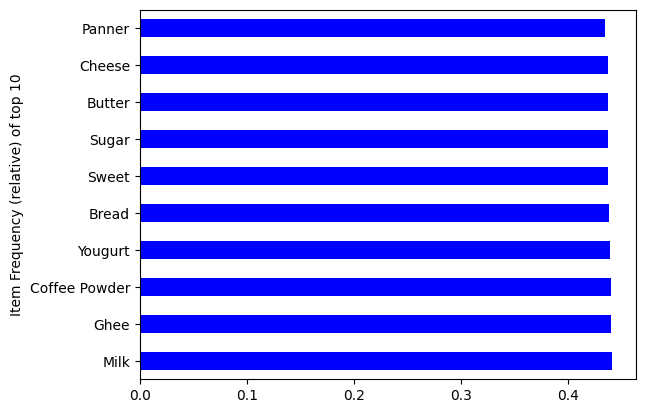

In [14]:
itemFreq = df.sum(axis=0)/len(df)
ax = itemFreq.nlargest(10).plot.barh(color='blue')
plt.ylabel("Item Frequency (relative) of top 10")
plt.show()

In [26]:
itemsets = apriori(df, min_support = 0.01,use_colnames=True)

rules = association_rules(itemsets, metric= 'confidence', min_threshold = 0.5)

print(rules[['antecedents','consequents','support','confidence','lift']])

                                   antecedents consequents   support  \
0                               (Sweet, Sugar)    (Butter)  0.099705   
1                              (Sweet, Panner)     (Lassi)  0.100982   
2                              (Panner, Lassi)     (Sweet)  0.100982   
3                  (Bread, Butter, Tea Powder)   (Yougurt)  0.045182   
4              (Panner, Cheese, Coffee Powder)     (Bread)  0.046779   
..                                         ...         ...       ...   
631  (Tea Powder, Yougurt, Ghee, Sugar, Lassi)      (Milk)  0.010218   
632   (Tea Powder, Yougurt, Ghee, Lassi, Milk)     (Sugar)  0.010218   
633   (Tea Powder, Sugar, Lassi, Panner, Milk)     (Sweet)  0.011336   
634   (Tea Powder, Sugar, Sweet, Panner, Milk)     (Lassi)  0.011336   
635      (Yougurt, Sugar, Sweet, Panner, Milk)     (Lassi)  0.010378   

     confidence      lift  
0      0.500601  1.144140  
1      0.504990  1.164582  
2      0.506608  1.157446  
3      0.502664  1.1442

In [19]:
rules.sort_values(by = 'lift', ascending=False).head(6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
457,"(Tea Powder, Ghee, Bread, Sweet, Panner)",(Lassi),0.019877,0.433623,0.011096,0.558233,1.287368,0.002477,1.282071,0.227748
630,"(Tea Powder, Ghee, Sweet, Panner, Milk)",(Lassi),0.019717,0.433623,0.010936,0.554656,1.279119,0.002386,1.271773,0.222601
615,"(Tea Powder, Coffee Powder, Sugar, Sweet, Panner)",(Lassi),0.021234,0.433623,0.011735,0.552632,1.274451,0.002527,1.266018,0.220020
438,"(Tea Powder, Coffee Powder, Bread, Sweet, Panner)",(Lassi),0.020675,0.433623,0.011415,0.552124,1.273279,0.002450,1.264582,0.219157
325,"(Sweet, Panner, Ghee, Tea Powder)",(Lassi),0.042388,0.433623,0.023389,0.551789,1.272508,0.005009,1.263639,0.223629
520,"(Tea Powder, Butter, Coffee Powder, Sweet, Milk)",(Sugar),0.021234,0.437615,0.011814,0.556391,1.271417,0.002522,1.267750,0.218108


In [20]:
rules_df = rules.sort_values(by = ['lift','confidence'], ascending=False)
relv_rules = rules_df[rules_df['lift']>1]
relv_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
457,"(Tea Powder, Ghee, Bread, Sweet, Panner)",(Lassi),0.019877,0.433623,0.011096,0.558233,1.287368,0.002477,1.282071,0.227748
630,"(Tea Powder, Ghee, Sweet, Panner, Milk)",(Lassi),0.019717,0.433623,0.010936,0.554656,1.279119,0.002386,1.271773,0.222601
615,"(Tea Powder, Coffee Powder, Sugar, Sweet, Panner)",(Lassi),0.021234,0.433623,0.011735,0.552632,1.274451,0.002527,1.266018,0.220020
438,"(Tea Powder, Coffee Powder, Bread, Sweet, Panner)",(Lassi),0.020675,0.433623,0.011415,0.552124,1.273279,0.002450,1.264582,0.219157
325,"(Sweet, Panner, Ghee, Tea Powder)",(Lassi),0.042388,0.433623,0.023389,0.551789,1.272508,0.005009,1.263639,0.223629
...,...,...,...,...,...,...,...,...,...,...
102,"(Bread, Butter, Panner, Tea Powder)",(Ghee),0.042468,0.439850,0.021234,0.500000,1.136751,0.002554,1.120300,0.125636
451,"(Tea Powder, Bread, Lassi, Sweet, Milk)",(Ghee),0.021713,0.439850,0.010857,0.500000,1.136751,0.001306,1.120300,0.122970
560,"(Coffee Powder, Lassi, Panner, Milk, Cheese)",(Ghee),0.021394,0.439850,0.010697,0.500000,1.136751,0.001287,1.120300,0.122930
241,"(Butter, Sugar, Lassi, Tea Powder)",(Milk),0.043586,0.441127,0.021793,0.500000,1.133460,0.002566,1.117746,0.123112
